# Webscraping

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import re

In [3]:
price = []
brand = []
rating = []
color = []
original_price = []
no_of_per_rated = []
discount = []
for i in range(1,14):
    print('https://www.flipkart.com/search?q=speakers&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page='+str(i))
    url = 'https://www.flipkart.com/search?q=speakers&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page='+str(i)
    page = requests.get(url)
    soup = BeautifulSoup(page.text)
    
    #price column
    p = soup.find_all("div",class_ = "Nx9bqj")
    for i in p:
        price.append(i.text)

        

    #brands
    b = soup.find_all('a',class_ = 'wjcEIp')
    for i in b:
        brand.append(i.text.split()[0])

    #ratings
    r = soup.find_all('div',class_ = 'XQDdHH')
    for i in r:
        rating.append(i.text)

    #color
    c = soup.find_all('div',class_ = 'NqpwHC')
    for i in c:
        color.append(i.text.split(',')[0])

    #discount
    d = soup.find_all('div',class_ = 'UkUFwK')
    for i in d:
        discount.append(i.text)

    #original price
    op = soup.find_all('div',class_ = 'yRaY8j')
    for i in op:
        original_price.append(i.text)

    #no_of_per_rated
    pr = soup.find_all('span',class_ = 'Wphh3N')
    for i in pr:
        no_of_per_rated.append(i.text)

   # print(len(price))
        

        

        



https://www.flipkart.com/search?q=speakers&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=1
https://www.flipkart.com/search?q=speakers&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=2
https://www.flipkart.com/search?q=speakers&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=3
https://www.flipkart.com/search?q=speakers&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=4
https://www.flipkart.com/search?q=speakers&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=5
https://www.flipkart.com/search?q=speakers&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=6
https://www.flipkart.com/search?q=speakers&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=7
https://www.flipkart.com/search?q=speakers&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=8
https://www.flipkart.com

In [4]:
print(len(price))
print(len(brand))
print(len(rating))
print(len(color))
print(len(discount))
print(len(original_price))
print(len(no_of_per_rated))

584
520
655
520
579
514
460


In [5]:
price = price[0:410]
brand = brand[0:410]
rating = rating[0:410]
color = color[0:410]
original_price = original_price[0:410]
no_of_per_rated = no_of_per_rated[0:410]
discount = discount[0:410]

In [5]:
###Creating dataframe

In [6]:
d = {'Price':price,
     'Brand':brand,
     'Rating':rating,
     'Color':color,
     'Discount':discount,
     'Original_price':original_price,
     'No_Of_Persons_Rated':no_of_per_rated}

In [7]:
df = pd.DataFrame(d)

In [8]:
df.to_csv('project1.csv')

In [9]:
df

,Price,Brand,Rating,Color,Discount,Original_price,No_Of_Persons_Rated
0,"₹3,999",MOTOROLA,4.3,Black/Metallic grey,70% off,"₹13,499","(7,470)"
1,"₹2,299",MarQ,4.2,Black,77% off,"₹9,999","(2,848)"
2,₹389,F,3.9,Black,74% off,"₹1,500","(89,868)"
3,₹269,MZ,4.1,Multicolor,66% off,₹799,"(23,153)"
4,"₹1,199",JBL,4.2,Black,60% off,"₹2,999","(52,414)"
...,...,...,...,...,...,...,...
405,"₹2,299",G2L,4.3,Black,62% off,"₹1,999","(17,049)"
406,₹649,TRIGGR,4.3,Red Eclipse,75% off,"₹3,499","(1,787)"
407,₹420,QCY,3.9,Black,78% off,"₹3,999","(30,989)"
408,₹550,Macjack,3.6,Teal,49% off,"₹1,399",(841)


In [10]:
###Data cleaning

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410 entries, 0 to 409
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Price                410 non-null    object
 1   Brand                410 non-null    object
 2   Rating               410 non-null    object
 3   Color                410 non-null    object
 4   Discount             410 non-null    object
 5   Original_price       410 non-null    object
 6   No_Of_Persons_Rated  410 non-null    object
dtypes: object(7)
memory usage: 22.6+ KB


In [12]:
df.isna().sum()

Price                  0
Brand                  0
Rating                 0
Color                  0
Discount               0
Original_price         0
No_Of_Persons_Rated    0
dtype: int64

In [13]:
df['Price'] = (
    df['Price']
      .str.replace('₹', '', regex=False)
      .str.replace(',', '', regex=False)
      .str.replace('\u00a0', '', regex=True)   # remove non-printable space
      .astype(float)
)


In [16]:
pd.read_csv('project1.csv')

,Unnamed: 0,Price,Brand,Rating,Color,Discount,Original_price,No_Of_Persons_Rated
0,0,"₹3,999",MOTOROLA,4.3,Black/Metallic grey,70% off,"₹13,499","(7,470)"
1,1,"₹2,299",MarQ,4.2,Black,77% off,"₹9,999","(2,848)"
2,2,₹389,F,3.9,Black,74% off,"₹1,500","(89,868)"
3,3,₹269,MZ,4.1,Multicolor,66% off,₹799,"(23,153)"
4,4,"₹1,199",JBL,4.2,Black,60% off,"₹2,999","(52,414)"
...,...,...,...,...,...,...,...,...
405,405,"₹2,299",G2L,4.3,Black,62% off,"₹1,999","(17,049)"
406,406,₹649,TRIGGR,4.3,Red Eclipse,75% off,"₹3,499","(1,787)"
407,407,₹420,QCY,3.9,Black,78% off,"₹3,999","(30,989)"
408,408,₹550,Macjack,3.6,Teal,49% off,"₹1,399",(841)


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410 entries, 0 to 409
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Price                410 non-null    int64 
 1   Brand                410 non-null    object
 2   Rating               410 non-null    object
 3   Color                410 non-null    object
 4   Discount             410 non-null    int64 
 5   Original_price       410 non-null    int64 
 6   No_Of_Persons_Rated  410 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 22.6+ KB


In [17]:
df

,Price,Brand,Rating,Color,Discount,Original_price,No_Of_Persons_Rated
0,3999.0,MOTOROLA,4.3,Black/Metallic grey,70% off,"₹13,499","(7,470)"
1,2299.0,MarQ,4.2,Black,77% off,"₹9,999","(2,848)"
2,389.0,F,3.9,Black,74% off,"₹1,500","(89,868)"
3,269.0,MZ,4.1,Multicolor,66% off,₹799,"(23,153)"
4,1199.0,JBL,4.2,Black,60% off,"₹2,999","(52,414)"
...,...,...,...,...,...,...,...
405,2299.0,G2L,4.3,Black,62% off,"₹1,999","(17,049)"
406,649.0,TRIGGR,4.3,Red Eclipse,75% off,"₹3,499","(1,787)"
407,420.0,QCY,3.9,Black,78% off,"₹3,999","(30,989)"
408,550.0,Macjack,3.6,Teal,49% off,"₹1,399",(841)


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410 entries, 0 to 409
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Price                410 non-null    float64
 1   Brand                410 non-null    object 
 2   Rating               410 non-null    object 
 3   Color                410 non-null    object 
 4   Discount             410 non-null    object 
 5   Original_price       410 non-null    object 
 6   No_Of_Persons_Rated  410 non-null    object 
dtypes: float64(1), object(6)
memory usage: 22.6+ KB


In [19]:
df['Original_price'] = df['Original_price'].str.replace('₹','').str.replace(',','').astype('float')

In [20]:
df

,Price,Brand,Rating,Color,Discount,Original_price,No_Of_Persons_Rated
0,3999.0,MOTOROLA,4.3,Black/Metallic grey,70% off,13499.0,"(7,470)"
1,2299.0,MarQ,4.2,Black,77% off,9999.0,"(2,848)"
2,389.0,F,3.9,Black,74% off,1500.0,"(89,868)"
3,269.0,MZ,4.1,Multicolor,66% off,799.0,"(23,153)"
4,1199.0,JBL,4.2,Black,60% off,2999.0,"(52,414)"
...,...,...,...,...,...,...,...
405,2299.0,G2L,4.3,Black,62% off,1999.0,"(17,049)"
406,649.0,TRIGGR,4.3,Red Eclipse,75% off,3499.0,"(1,787)"
407,420.0,QCY,3.9,Black,78% off,3999.0,"(30,989)"
408,550.0,Macjack,3.6,Teal,49% off,1399.0,(841)


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410 entries, 0 to 409
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Price                410 non-null    float64
 1   Brand                410 non-null    object 
 2   Rating               410 non-null    object 
 3   Color                410 non-null    object 
 4   Discount             410 non-null    object 
 5   Original_price       410 non-null    float64
 6   No_Of_Persons_Rated  410 non-null    object 
dtypes: float64(2), object(5)
memory usage: 22.6+ KB


In [22]:
df['No_Of_Persons_Rated'] = df['No_Of_Persons_Rated'].str.replace('(','').str.replace(')','').replace(',','')

In [23]:
df['No_Of_Persons_Rated'].replace(',','')

0       7,470
1       2,848
2      89,868
3      23,153
4      52,414
        ...  
405    17,049
406     1,787
407    30,989
408       841
409        21
Name: No_Of_Persons_Rated, Length: 410, dtype: object

In [24]:
df['No_Of_Persons_Rated'] = df['No_Of_Persons_Rated'].str.replace(',','')

In [25]:
df

,Price,Brand,Rating,Color,Discount,Original_price,No_Of_Persons_Rated
0,3999.0,MOTOROLA,4.3,Black/Metallic grey,70% off,13499.0,7470
1,2299.0,MarQ,4.2,Black,77% off,9999.0,2848
2,389.0,F,3.9,Black,74% off,1500.0,89868
3,269.0,MZ,4.1,Multicolor,66% off,799.0,23153
4,1199.0,JBL,4.2,Black,60% off,2999.0,52414
...,...,...,...,...,...,...,...
405,2299.0,G2L,4.3,Black,62% off,1999.0,17049
406,649.0,TRIGGR,4.3,Red Eclipse,75% off,3499.0,1787
407,420.0,QCY,3.9,Black,78% off,3999.0,30989
408,550.0,Macjack,3.6,Teal,49% off,1399.0,841


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410 entries, 0 to 409
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Price                410 non-null    float64
 1   Brand                410 non-null    object 
 2   Rating               410 non-null    object 
 3   Color                410 non-null    object 
 4   Discount             410 non-null    object 
 5   Original_price       410 non-null    float64
 6   No_Of_Persons_Rated  410 non-null    object 
dtypes: float64(2), object(5)
memory usage: 22.6+ KB


In [27]:
df['No_Of_Persons_Rated'] = df['No_Of_Persons_Rated'].astype('int')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410 entries, 0 to 409
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Price                410 non-null    float64
 1   Brand                410 non-null    object 
 2   Rating               410 non-null    object 
 3   Color                410 non-null    object 
 4   Discount             410 non-null    object 
 5   Original_price       410 non-null    float64
 6   No_Of_Persons_Rated  410 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 22.6+ KB


In [29]:
df

,Price,Brand,Rating,Color,Discount,Original_price,No_Of_Persons_Rated
0,3999.0,MOTOROLA,4.3,Black/Metallic grey,70% off,13499.0,7470
1,2299.0,MarQ,4.2,Black,77% off,9999.0,2848
2,389.0,F,3.9,Black,74% off,1500.0,89868
3,269.0,MZ,4.1,Multicolor,66% off,799.0,23153
4,1199.0,JBL,4.2,Black,60% off,2999.0,52414
...,...,...,...,...,...,...,...
405,2299.0,G2L,4.3,Black,62% off,1999.0,17049
406,649.0,TRIGGR,4.3,Red Eclipse,75% off,3499.0,1787
407,420.0,QCY,3.9,Black,78% off,3999.0,30989
408,550.0,Macjack,3.6,Teal,49% off,1399.0,841


In [30]:
df['Rating'] = df['Rating'].astype('float')

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410 entries, 0 to 409
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Price                410 non-null    float64
 1   Brand                410 non-null    object 
 2   Rating               410 non-null    float64
 3   Color                410 non-null    object 
 4   Discount             410 non-null    object 
 5   Original_price       410 non-null    float64
 6   No_Of_Persons_Rated  410 non-null    int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 22.6+ KB


In [32]:
df

,Price,Brand,Rating,Color,Discount,Original_price,No_Of_Persons_Rated
0,3999.0,MOTOROLA,4.3,Black/Metallic grey,70% off,13499.0,7470
1,2299.0,MarQ,4.2,Black,77% off,9999.0,2848
2,389.0,F,3.9,Black,74% off,1500.0,89868
3,269.0,MZ,4.1,Multicolor,66% off,799.0,23153
4,1199.0,JBL,4.2,Black,60% off,2999.0,52414
...,...,...,...,...,...,...,...
405,2299.0,G2L,4.3,Black,62% off,1999.0,17049
406,649.0,TRIGGR,4.3,Red Eclipse,75% off,3499.0,1787
407,420.0,QCY,3.9,Black,78% off,3999.0,30989
408,550.0,Macjack,3.6,Teal,49% off,1399.0,841


In [33]:
df

,Price,Brand,Rating,Color,Discount,Original_price,No_Of_Persons_Rated
0,3999.0,MOTOROLA,4.3,Black/Metallic grey,70% off,13499.0,7470
1,2299.0,MarQ,4.2,Black,77% off,9999.0,2848
2,389.0,F,3.9,Black,74% off,1500.0,89868
3,269.0,MZ,4.1,Multicolor,66% off,799.0,23153
4,1199.0,JBL,4.2,Black,60% off,2999.0,52414
...,...,...,...,...,...,...,...
405,2299.0,G2L,4.3,Black,62% off,1999.0,17049
406,649.0,TRIGGR,4.3,Red Eclipse,75% off,3499.0,1787
407,420.0,QCY,3.9,Black,78% off,3999.0,30989
408,550.0,Macjack,3.6,Teal,49% off,1399.0,841


In [34]:
df.to_csv('speakers.csv')

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410 entries, 0 to 409
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Price                410 non-null    float64
 1   Brand                410 non-null    object 
 2   Rating               410 non-null    float64
 3   Color                410 non-null    object 
 4   Discount             410 non-null    object 
 5   Original_price       410 non-null    float64
 6   No_Of_Persons_Rated  410 non-null    int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 22.6+ KB


In [47]:
df['Discount'] = df['Discount'].str.replace('off',"")

In [48]:
df

,Price,Brand,Rating,Color,Discount,Original_price,No_Of_Persons_Rated
0,3999.0,MOTOROLA,4.3,Black/Metallic grey,70%,13499.0,7470
1,2299.0,MarQ,4.2,Black,77%,9999.0,2848
2,389.0,F,3.9,Black,74%,1500.0,89868
3,269.0,MZ,4.1,Multicolor,66%,799.0,23153
4,1199.0,JBL,4.2,Black,60%,2999.0,52414
...,...,...,...,...,...,...,...
405,2299.0,G2L,4.3,Black,62%,1999.0,17049
406,649.0,TRIGGR,4.3,Red Eclipse,75%,3499.0,1787
407,420.0,QCY,3.9,Black,78%,3999.0,30989
408,550.0,Macjack,3.6,Teal,49%,1399.0,841


In [22]:
df.to_csv('sample.csv')

In [10]:
df

,Price,Brand,Rating,Color,Discount,Original_price,No_Of_Persons_Rated
0,"₹3,999",MOTOROLA,4.3,Black/Metallic grey,70% off,"₹13,499","(7,470)"
1,"₹2,299",MarQ,4.2,Black,77% off,"₹9,999","(2,848)"
2,₹389,F,3.9,Black,74% off,"₹1,500","(89,868)"
3,₹269,MZ,4.1,Multicolor,66% off,₹799,"(23,153)"
4,"₹1,199",JBL,4.2,Black,60% off,"₹2,999","(52,414)"
...,...,...,...,...,...,...,...
405,"₹2,299",HP,3.9,Black,62% off,"₹24,999","(60,115)"
406,₹649,MOTOROLA,4.3,Metallic Grey,75% off,"₹39,999",(118)
407,₹420,MOTOROLA,4.4,Black,78% off,"₹3,999","(8,127)"
408,₹550,MZ,4.2,Black,49% off,"₹2,999","(10,792)"


# data cleaning 

In [12]:
df['Price']=df['Price'].str.replace(',','').str.replace('₹','').str.strip()

In [14]:
df['Price']=df['Price'].astype('int')

In [15]:
df['Discount']=df['Discount'].str.replace('% off','').str.strip()

In [16]:
df['Discount']=df['Discount'].astype('int')

In [17]:
df['Original_price']=df['Original_price'].str.replace(',','').str.replace('₹','').str.strip()

In [18]:
df['Original_price']=df['Original_price'].astype('int')

In [19]:
df['No_Of_Persons_Rated']=df['No_Of_Persons_Rated'].str.replace(',','').str.replace('(','').str.replace(')','').str.strip()

In [20]:
df['No_Of_Persons_Rated']=df['No_Of_Persons_Rated'].astype('int')

In [21]:
df

,Price,Brand,Rating,Color,Discount,Original_price,No_Of_Persons_Rated
0,3999,MOTOROLA,4.3,Black/Metallic grey,70,13499,7470
1,2299,MarQ,4.2,Black,77,9999,2848
2,389,F,3.9,Black,74,1500,89868
3,269,MZ,4.1,Multicolor,66,799,23153
4,1199,JBL,4.2,Black,60,2999,52414
...,...,...,...,...,...,...,...
405,2299,HP,3.9,Black,62,24999,60115
406,649,MOTOROLA,4.3,Metallic Grey,75,39999,118
407,420,MOTOROLA,4.4,Black,78,3999,8127
408,550,MZ,4.2,Black,49,2999,10792


#  Data Analysis

In [42]:
df['Brand'].unique()

array(['MOTOROLA', 'MarQ', 'F', 'MZ', 'JBL', 'boAt', 'WOOS', 'LIMBRO',
       'ZEBRONICS', 'Mivi', 'TRIGGR', 'Aroma', 'Portronics', 'Nu',
       'Dubstep', 'PTron', 'Frontech', 'GOVO', 'fire', 'GOBOULT', 'ME&U',
       'SAREGAMA', 'UIC', 'Syvo', 'YAROH', 'Blaupunkt', 'GUGGU', 'Alexa',
       'TOPLUS', 'SONY', 'F&D', 'Marshall', 'Intex', 'Palco', 'etmax',
       'SnapUp', 'Bencley', 'Tec', 'Jmax', 'M-BELIVER', 'Mi', 'AJ',
       'KRISONS', 'PHILIPS', 'VIJYONICS', 'Egate', 'ACwO', 'RGV',
       'MECKWELL', 'HOUSE', 'Ortel', 'Macjack', 'Gr', 'artis', 'JAXTER',
       'TWS', 'echovibe', 'TERABYTE', 'house', 'Clairbell', 'HP'],
      dtype=object)

In [43]:
df['Brand'].nunique()

61

In [44]:
df['Brand'].value_counts()

Brand
ZEBRONICS    49
Aroma        44
TRIGGR       32
boAt         31
Mivi         25
             ..
artis         1
echovibe      1
TERABYTE      1
house         1
HP            1
Name: count, Length: 61, dtype: int64

In [45]:
df['Price'].describe()

count      410.000000
mean      2592.792683
std       5116.438422
min        269.000000
25%        623.000000
50%        999.000000
75%       2299.000000
max      45990.000000
Name: Price, dtype: float64

In [46]:
df.groupby("Brand")['Price'].agg(['mean','min','max'])

,mean,min,max
Brand,,,
ACwO,1658.000000,1658,1658
AJ,38999.000000,38999,38999
Alexa,2849.000000,1199,4499
Aroma,2595.840909,299,11499
Bencley,1664.000000,629,2699
...,...,...,...
boAt,2402.903226,299,8499
echovibe,1201.000000,1201,1201
etmax,8999.000000,8999,8999


# Univariate Analysis Questions & Code

# Q1. What is the distribution of continuous variables?

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


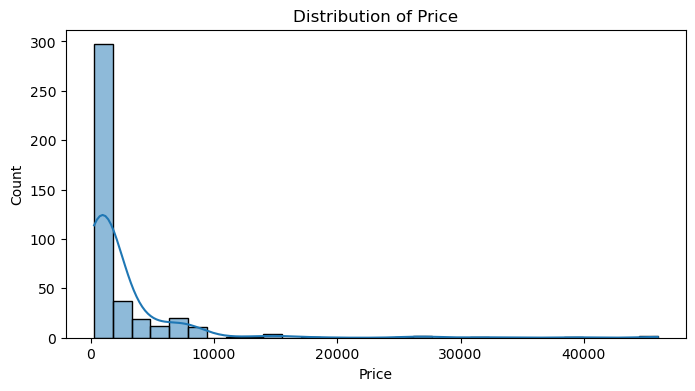

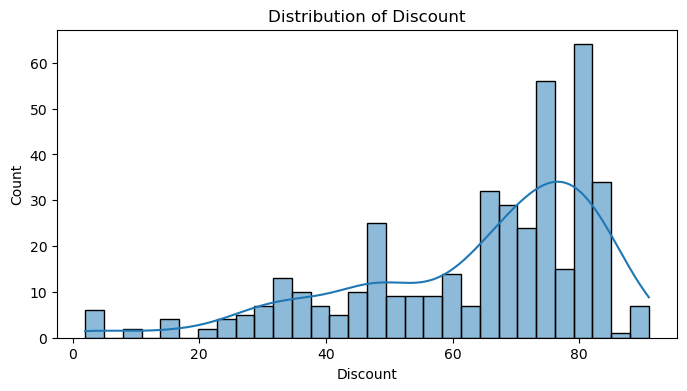

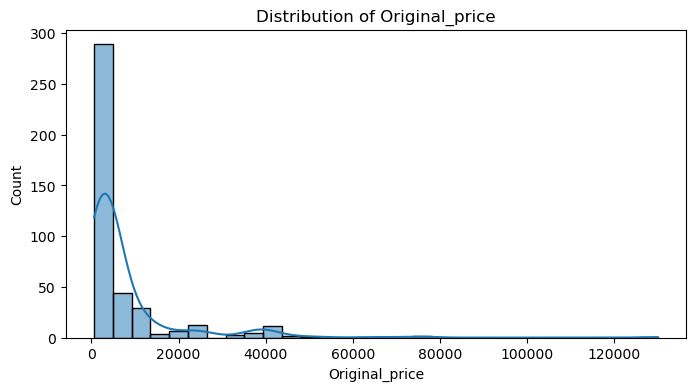

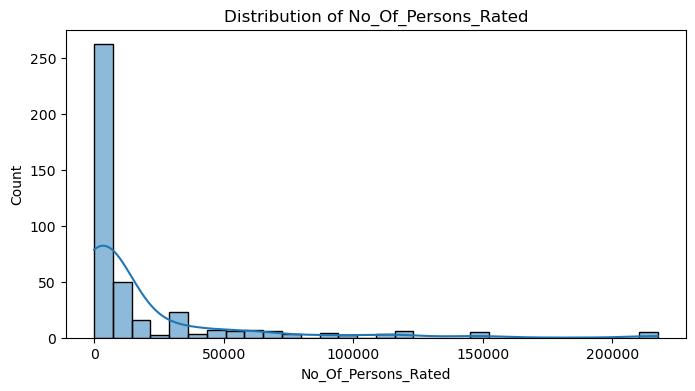

In [25]:
continuous_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in continuous_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()


# Q2. What are the summary statistics (mean, median, std deviation)?

In [26]:
df[continuous_cols].describe().T


,count,mean,std,min,25%,50%,75%,max
Price,410.0,2592.792683,5116.438422,269.0,623.0,999.0,2299.0,45990.0
Discount,410.0,63.943902,19.345887,2.0,50.0,70.0,80.0,91.0
Original_price,410.0,7474.358537,12477.664312,599.0,1999.0,3499.0,5099.0,129999.0
No_Of_Persons_Rated,410.0,17757.704878,35959.928735,3.0,841.0,3429.0,11278.5,217477.0


# Q3. Which continuous variable has outliers?

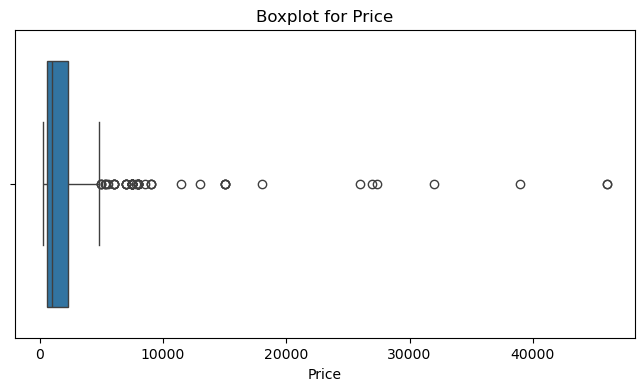

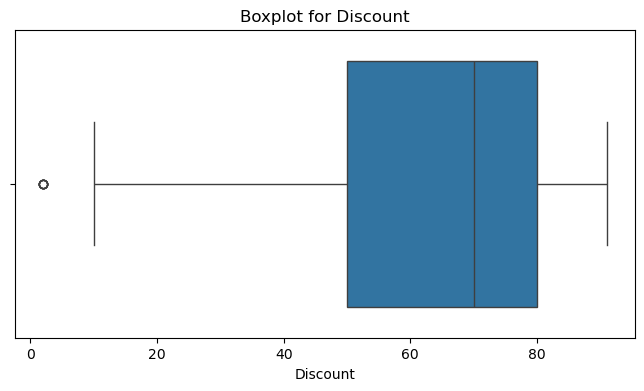

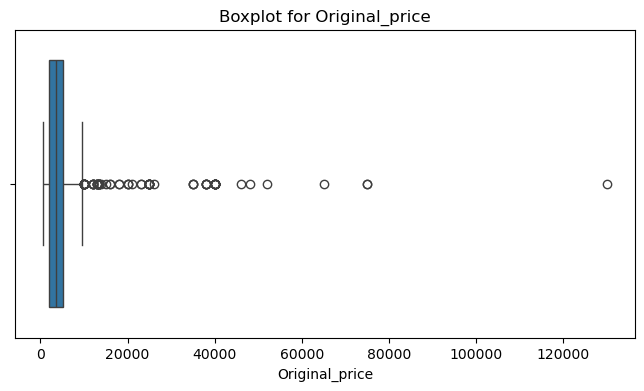

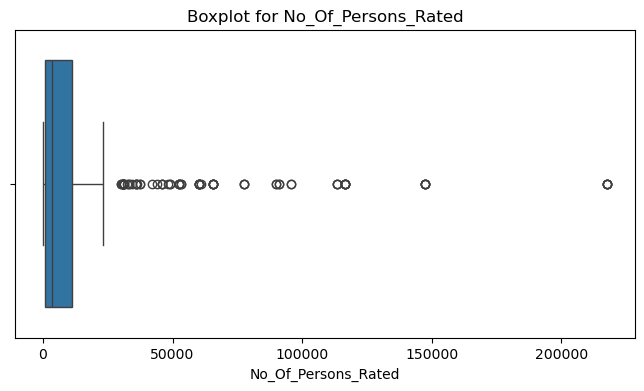

In [27]:
for col in continuous_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col}')
    plt.show()


# Q4. What are the frequencies of categorical variables?

In [28]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

for col in categorical_cols:
    print(df[col].value_counts(normalize=True) * 100)


Brand
ZEBRONICS    11.951220
Aroma        10.731707
TRIGGR        7.804878
boAt          7.560976
Mivi          6.097561
               ...    
artis         0.243902
echovibe      0.243902
TERABYTE      0.243902
house         0.243902
HP            0.243902
Name: proportion, Length: 61, dtype: float64
Rating
4      16.341463
3.9    14.634146
4.3    13.170732
4.2    11.219512
4.1    10.000000
5       9.268293
4.4     7.804878
3.8     6.097561
3       2.682927
3.7     2.439024
3.6     2.439024
4.5     1.951220
1       1.219512
4.6     0.731707
Name: proportion, dtype: float64
Color
Black                    43.902439
Blue                      6.341463
Multicolor                3.658537
Midnight Black            2.926829
Red                       2.682927
Rustic Dust               2.195122
Matte Black               2.195122
Onyx Blue                 2.195122
Active Blue               2.195122
Light Pink                1.951220
Red Eclipse               1.951220
Midnight Red              1

# Q5. Visualize categorical variable distribution

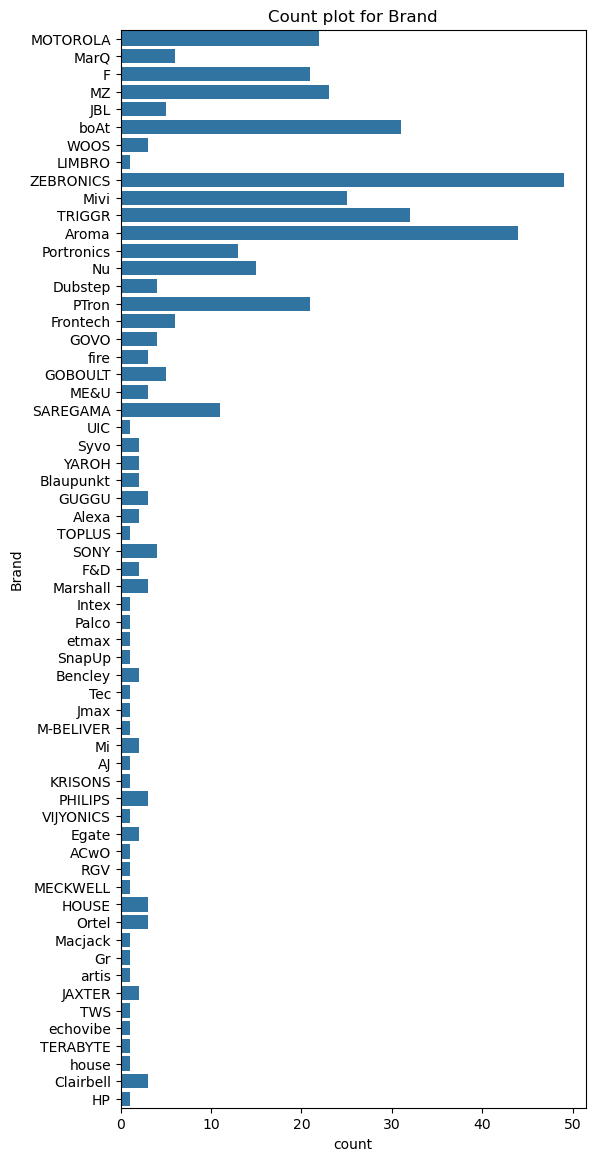

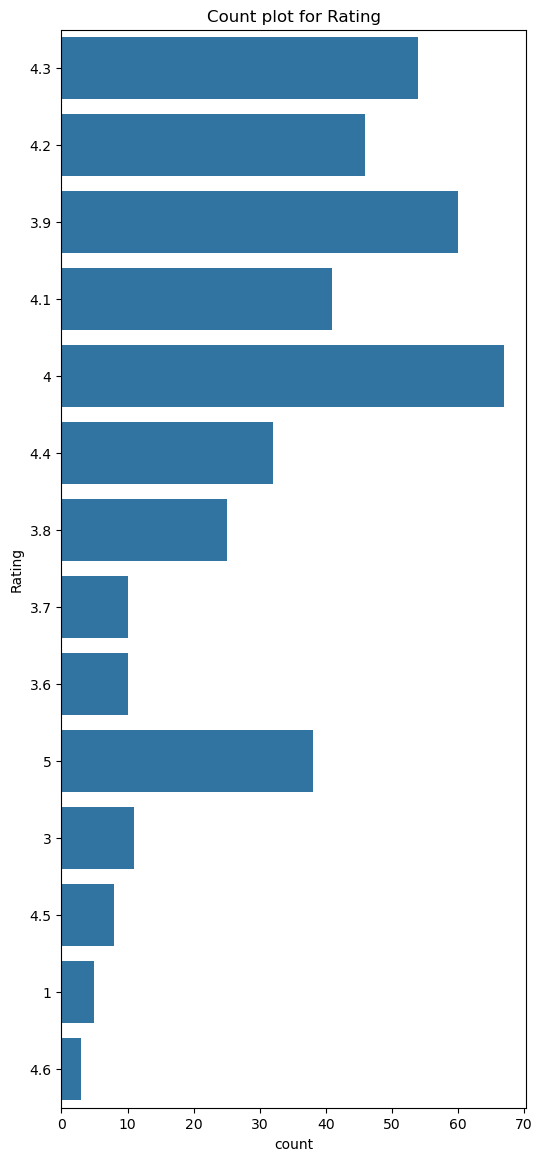

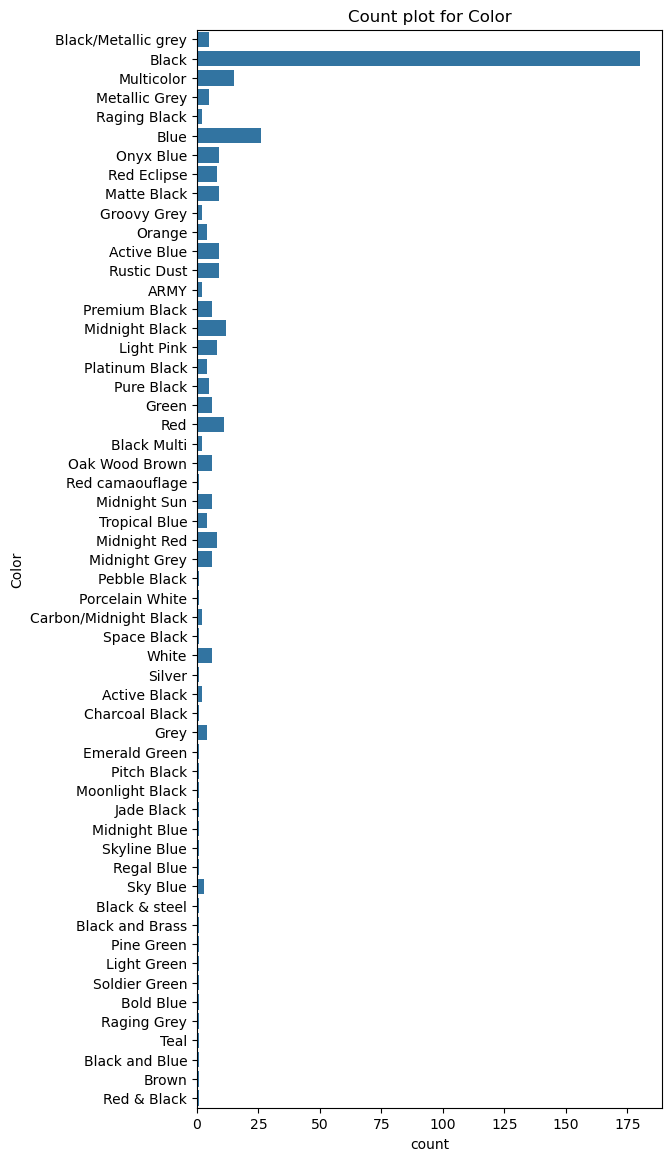

In [48]:
for col in categorical_cols:
    plt.figure(figsize=(6,14))
    sns.countplot(y=df[col])
    plt.title(f'Count plot for {col}')
    plt.show()


# Step 4. Bivariate Analysis Questions & Code

# Q6. What is the relationship between a categorical and continuous variable?

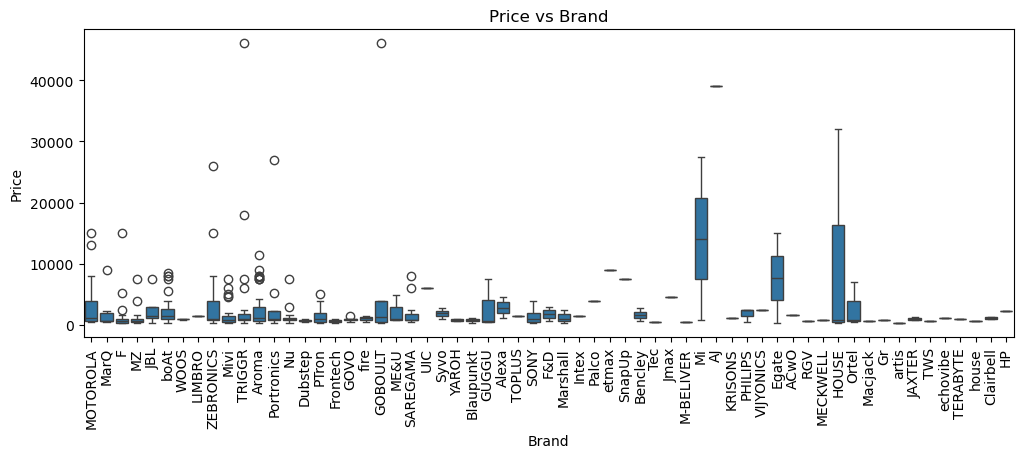

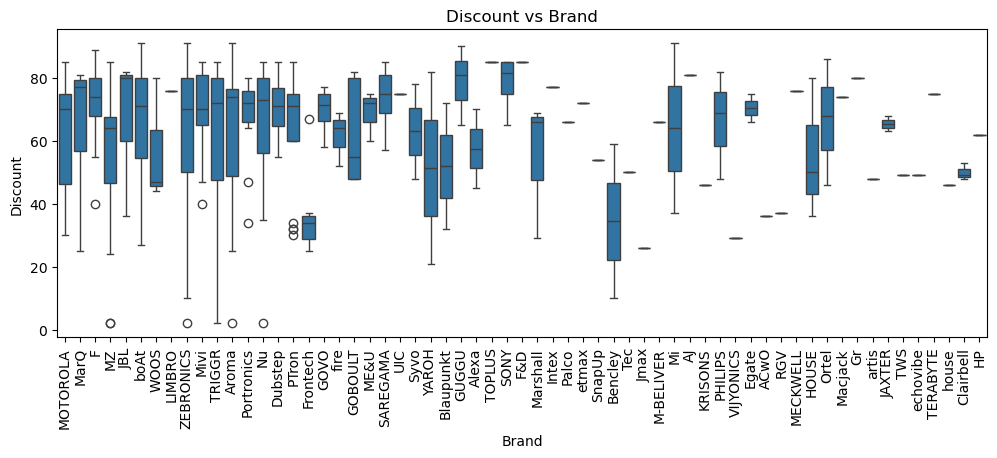

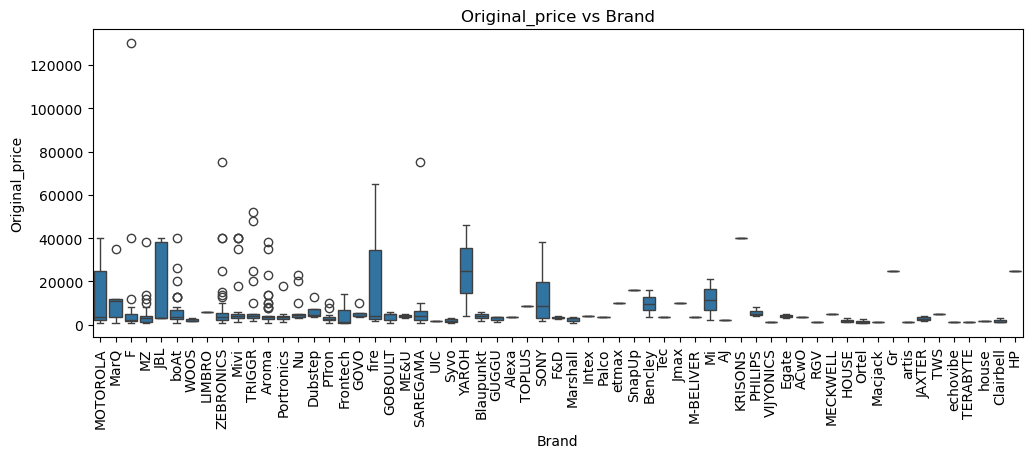

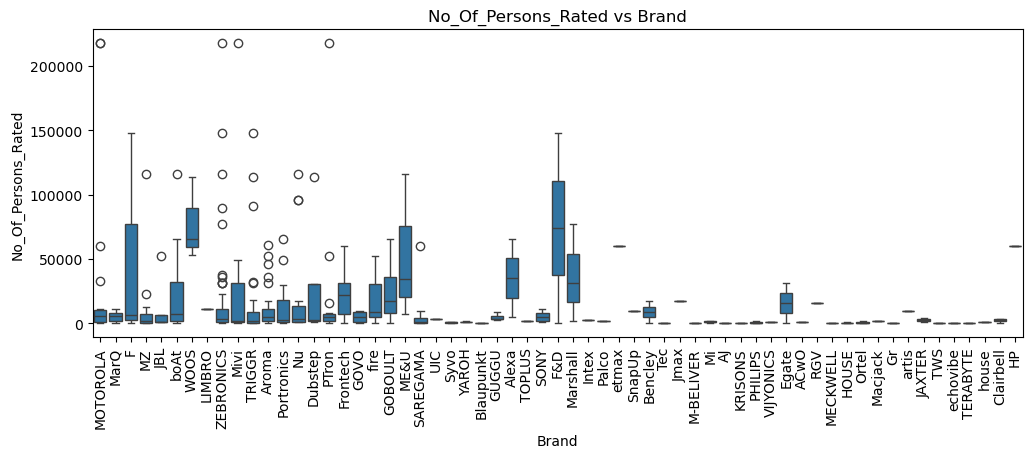

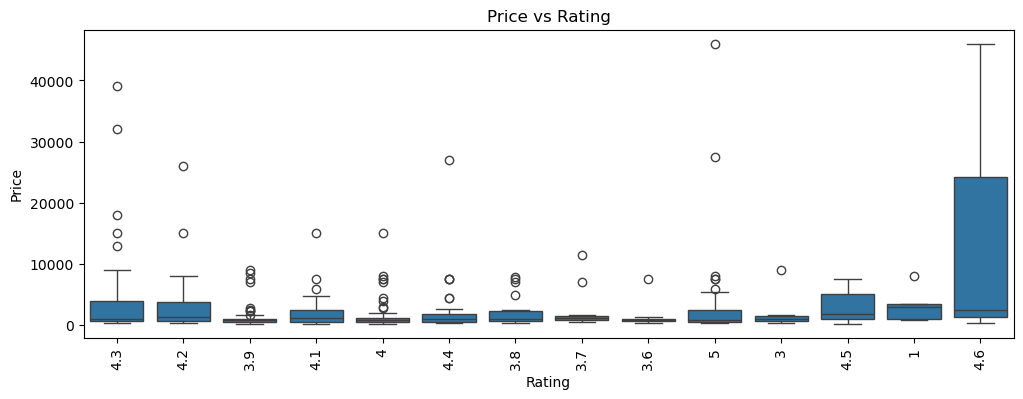

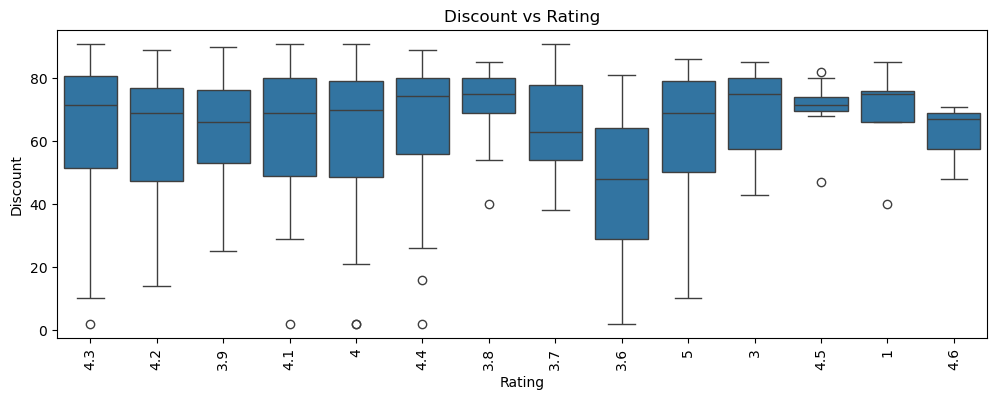

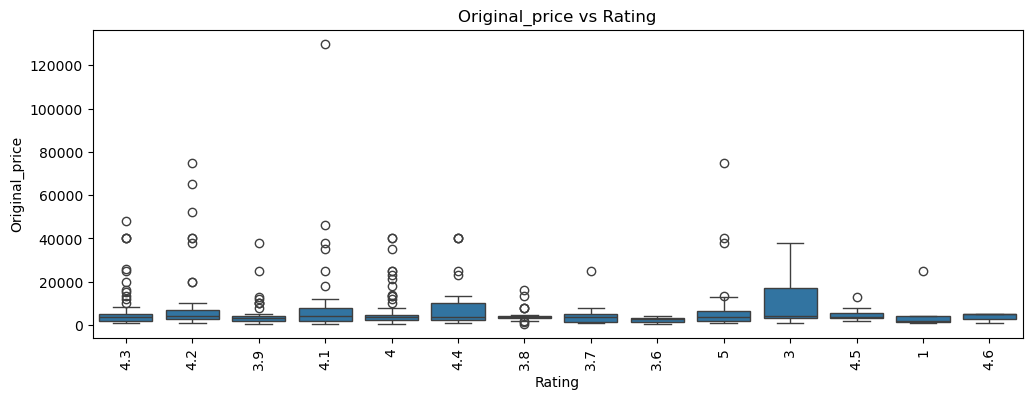

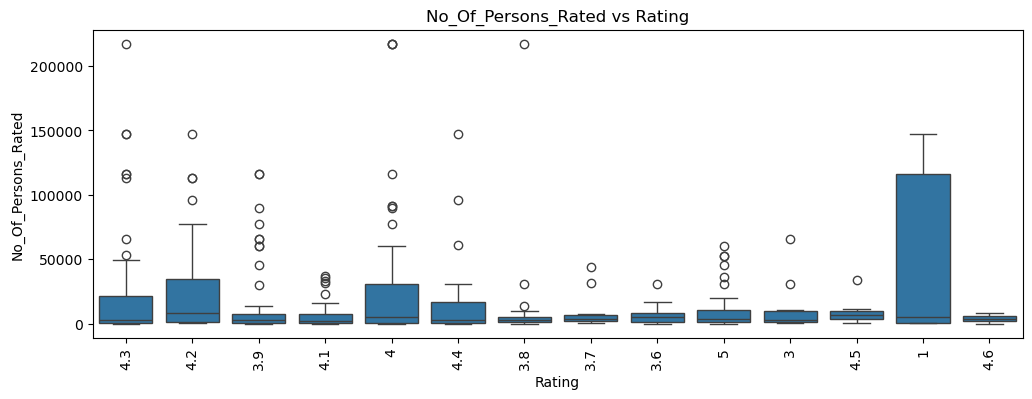

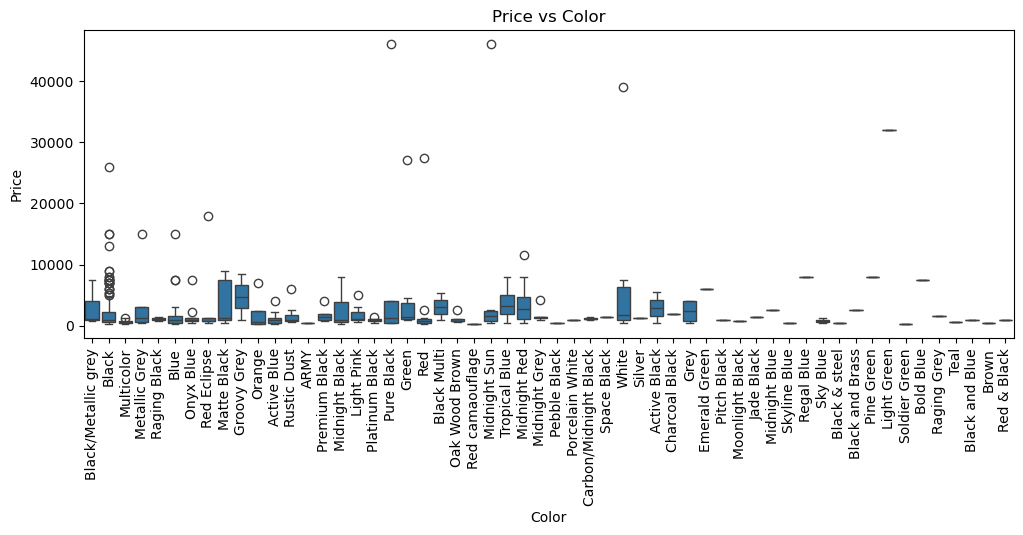

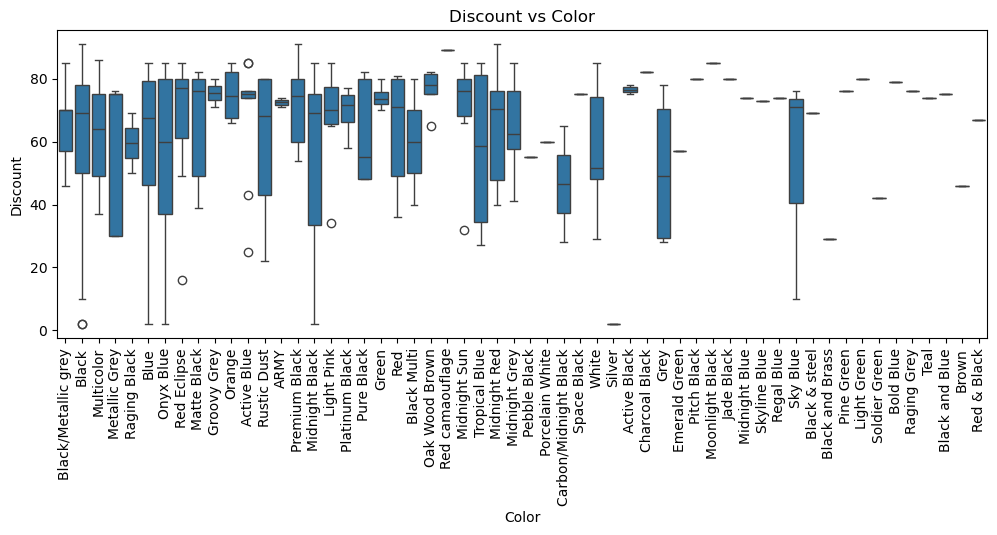

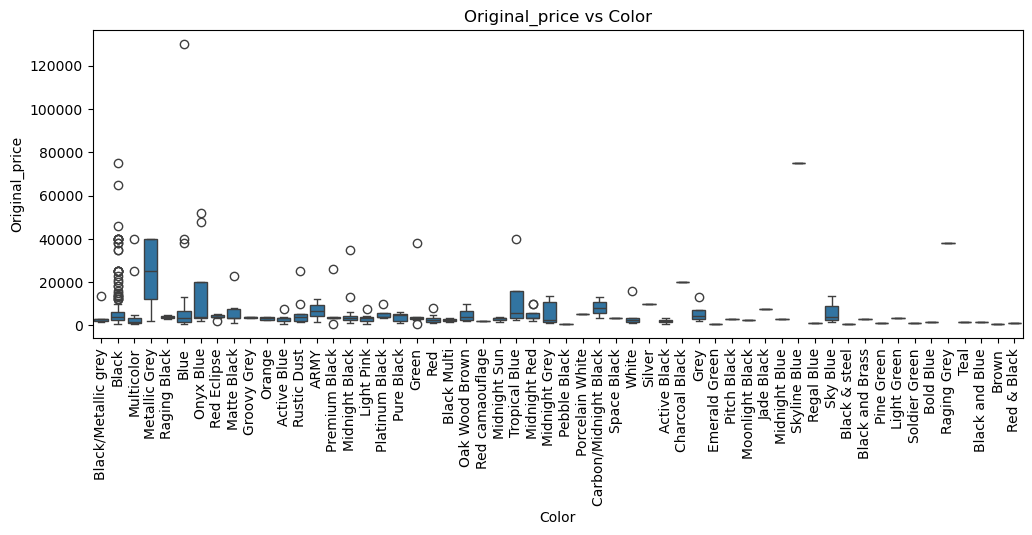

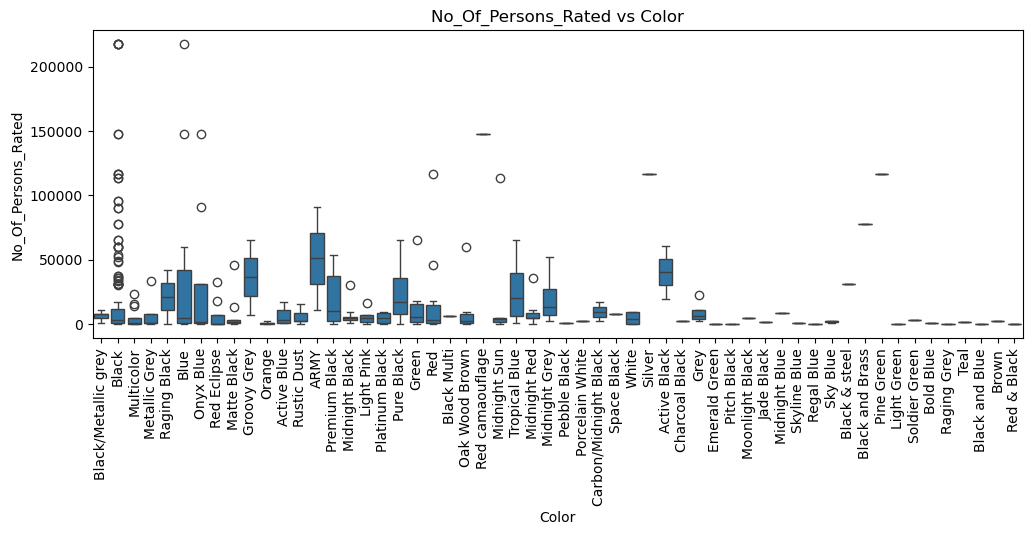

In [50]:
for cat in categorical_cols:
    for num in continuous_cols:
        plt.figure(figsize=(12,4))
        sns.boxplot(x=cat, y=num, data=df)
        plt.xticks(rotation=90)
        plt.title(f'{num} vs {cat}')
        plt.show()
        


# Q7. What is the correlation between continuous variables?

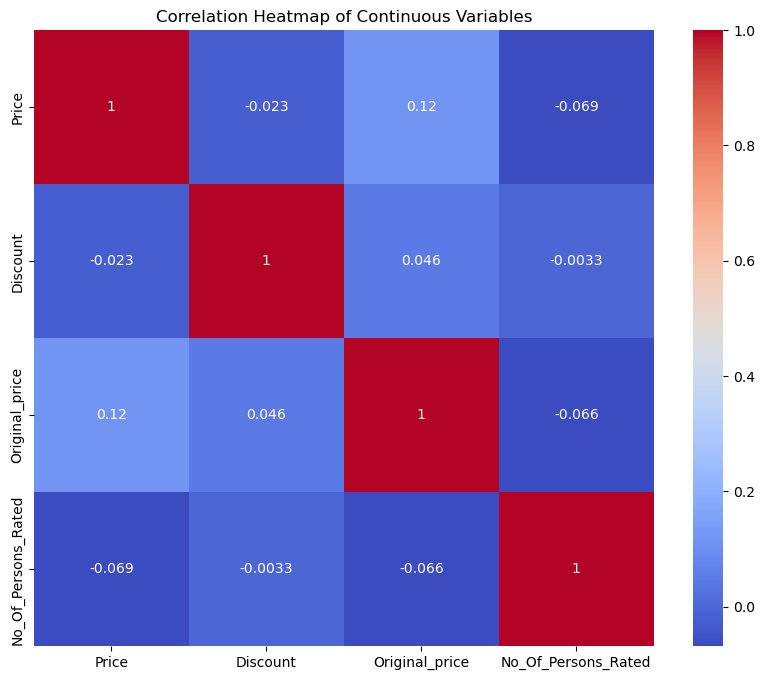

In [34]:
plt.figure(figsize=(10,8))
sns.heatmap(df[continuous_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Continuous Variables')
plt.show()


# Q8. What is the relationship between categorical variables?

In [36]:
from pandas import crosstab

for i in range(len(categorical_cols)):
    for j in range(i+1, len(categorical_cols)):
        print(f"\nCrosstab between {categorical_cols[i]} and {categorical_cols[j]}")
        print(pd.crosstab(df[categorical_cols[i]], df[categorical_cols[j]]))



Crosstab between Brand and Rating
Rating    1  3  3.6  3.7  3.8  3.9   4  4.1  4.2  4.3  4.4  4.5  4.6  5
Brand                                                                  
ACwO      0  0    0    0    0    0   0    0    0    0    1    0    0  0
AJ        0  0    0    0    0    0   0    0    0    1    0    0    0  0
Alexa     0  0    0    0    0    1   0    0    0    1    0    0    0  0
Aroma     0  0    1    1    4    3  12    2    3    5    6    2    0  5
Bencley   0  0    0    0    0    0   0    0    0    1    1    0    0  0
...      .. ..  ...  ...  ...  ...  ..  ...  ...  ...  ...  ...  ... ..
boAt      1  1    0    2    2    3   4    6    4    3    1    1    0  3
echovibe  0  0    0    0    0    0   0    0    0    0    1    0    0  0
etmax     0  0    0    0    0    1   0    0    0    0    0    0    0  0
fire      0  0    0    0    0    0   0    0    1    0    1    0    0  1
house     0  0    0    0    0    0   0    0    1    0    0    0    0  0

[61 rows x 14 columns]

Cros

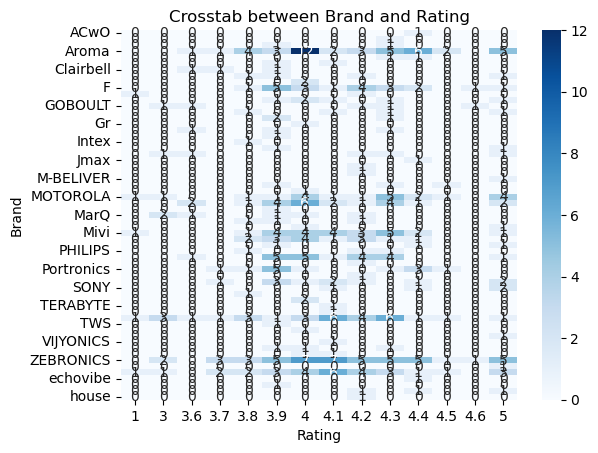

In [37]:
sns.heatmap(pd.crosstab(df[categorical_cols[0]], df[categorical_cols[1]]), annot=True, cmap="Blues")
plt.title(f'Crosstab between {categorical_cols[0]} and {categorical_cols[1]}')
plt.show()


# Multivariate Analysis Questions & Code

In [38]:
pd.pivot_table(df, index=categorical_cols[0], columns=categorical_cols[1], values=continuous_cols[0], aggfunc='mean')


Rating,1,3,3.6,3.7,3.8,3.9,4,4.1,4.2,4.3,4.4,4.5,4.6,5
Brand,,,,,,,,,,,,,,
ACwO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1658.000000,NaN,NaN,NaN
AJ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38999.000000,NaN,NaN,NaN,NaN
Alexa,NaN,NaN,NaN,NaN,NaN,1199.0,NaN,NaN,NaN,4499.000000,NaN,NaN,NaN,NaN
Aroma,NaN,NaN,1128.0,11499.0,2656.5,1299.0,960.166667,2799.000000,1932.333333,3839.000000,3130.333333,4299.0,NaN,3515.000000
Bencley,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,629.000000,2699.000000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
boAt,7990.0,999.0,NaN,1099.0,1737.5,3399.0,1168.750000,1421.833333,4499.000000,3322.333333,999.000000,799.0,NaN,2221.333333
echovibe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1201.000000,NaN,NaN,NaN
etmax,NaN,NaN,NaN,NaN,NaN,8999.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


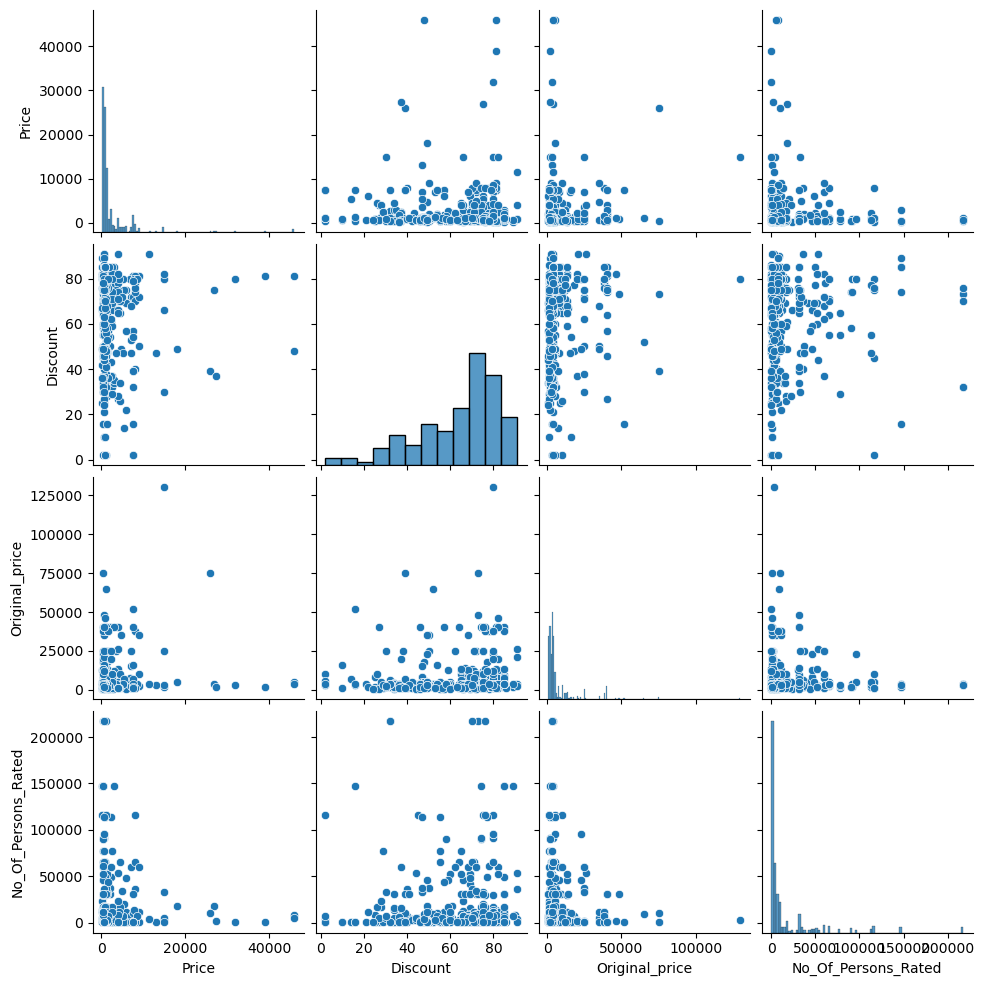

In [39]:
sns.pairplot(df[continuous_cols])
plt.show()


In [51]:
df


,Price,Brand,Rating,Color,Discount,Original_price,No_Of_Persons_Rated
0,3999,MOTOROLA,4.3,Black/Metallic grey,70,13499,7470
1,2299,MarQ,4.2,Black,77,9999,2848
2,389,F,3.9,Black,74,1500,89868
3,269,MZ,4.1,Multicolor,66,799,23153
4,1199,JBL,4.2,Black,60,2999,52414
...,...,...,...,...,...,...,...
405,2299,HP,3.9,Black,62,24999,60115
406,649,MOTOROLA,4.3,Metallic Grey,75,39999,118
407,420,MOTOROLA,4.4,Black,78,3999,8127
408,550,MZ,4.2,Black,49,2999,10792
